Original Codes from :  
https://www.kaggle.com/zoupet/neural-network-model-for-house-prices-tensorflow/output  
https://www.kaggle.com/diegosiebra/neural-network-model-for-house-prices-keras  
https://rfriend.tistory.com/450

In [1]:
import sys
print(sys.executable)

/opt/conda/bin/python


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
from IPython.display import clear_output
%matplotlib inline

import tensorflow as tf
# import tensorflow_addons as tfa

print('tensorflow version: {}'.format(tf.__version__))
print('GPU 사용 가능 여부: {}'.format(tf.test.is_gpu_available()))
print(tf.config.list_physical_devices('GPU'))

tensorflow version: 2.1.0
GPU 사용 가능 여부: False
[]


In [3]:
train_pandas = pd.read_csv("../input/train.csv")
test_pandas = pd.read_csv("../input/test.csv")

In [4]:
train_pandas

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
train_data = train_pandas
test_data = test_pandas
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train_data_without_label = train_data.drop(["SalePrice"],axis=1)
train_test_append = train_data_without_label.append(test_data)

dictionary_list = []
for col in train_test_append.select_dtypes(include=['object']).columns:
    tmp_dic = {}
    for number, key in enumerate(list(set(train_data_without_label[col].values))):
        if isinstance(key, float): # if key is 'nan' then value is also 'nan'
            tmp_dic[key] = key
        else:
            tmp_dic[key] = number
    dictionary_list.append(tmp_dic)
    print(col, tmp_dic, len(tmp_dic))

print(dictionary_list)

MSZoning {'FV': 0, 'RM': 1, 'RH': 2, 'C (all)': 3, 'RL': 4} 5
Street {'Grvl': 0, 'Pave': 1} 2
Alley {nan: nan, 'Grvl': 1, 'Pave': 2} 3
LotShape {'Reg': 0, 'IR2': 1, 'IR1': 2, 'IR3': 3} 4
LandContour {'HLS': 0, 'Lvl': 1, 'Low': 2, 'Bnk': 3} 4
Utilities {'AllPub': 0, 'NoSeWa': 1} 2
LotConfig {'FR3': 0, 'Inside': 1, 'FR2': 2, 'Corner': 3, 'CulDSac': 4} 5
LandSlope {'Sev': 0, 'Mod': 1, 'Gtl': 2} 3
Neighborhood {'BrDale': 0, 'NoRidge': 1, 'OldTown': 2, 'SWISU': 3, 'Blueste': 4, 'NAmes': 5, 'Blmngtn': 6, 'Somerst': 7, 'Veenker': 8, 'StoneBr': 9, 'Crawfor': 10, 'Sawyer': 11, 'IDOTRR': 12, 'NPkVill': 13, 'CollgCr': 14, 'SawyerW': 15, 'Edwards': 16, 'ClearCr': 17, 'Mitchel': 18, 'NridgHt': 19, 'NWAmes': 20, 'Gilbert': 21, 'BrkSide': 22, 'Timber': 23, 'MeadowV': 24} 25
Condition1 {'RRNe': 0, 'RRAn': 1, 'Feedr': 2, 'Norm': 3, 'PosA': 4, 'Artery': 5, 'PosN': 6, 'RRNn': 7, 'RRAe': 8} 9
Condition2 {'RRAn': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'Artery': 5, 'RRNn': 6, 'RRAe': 7} 8
BldgType 

In [7]:
for index, col in enumerate(train_data_without_label.select_dtypes(include=['object']).columns):
    train_data[col] = train_data[col].map(dictionary_list[index]).astype(float)
    test_data[col] = test_data[col].map(dictionary_list[index]).astype(float)

In [8]:
for col in train_data:
    if train_data[col].isnull().any(): # fill nan to mean in that column
        train_data[col] = train_data[col].fillna(train_data[col].mean())
for col in test_data:
    if test_data[col].isnull().any(): # fill nan to mean in that column
        test_data[col] = test_data[col].fillna(test_data[col].mean())

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null float64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null float64
Alley            1460 non-null float64
LotShape         1460 non-null float64
LandContour      1460 non-null float64
Utilities        1460 non-null float64
LotConfig        1460 non-null float64
LandSlope        1460 non-null float64
Neighborhood     1460 non-null float64
Condition1       1460 non-null float64
Condition2       1460 non-null float64
BldgType         1460 non-null float64
HouseStyle       1460 non-null float64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null float64
RoofMatl         1460 non-null float64
Exterior1s

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null float64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null float64
Alley            1459 non-null float64
LotShape         1459 non-null float64
LandContour      1459 non-null float64
Utilities        1459 non-null float64
LotConfig        1459 non-null float64
LandSlope        1459 non-null float64
Neighborhood     1459 non-null float64
Condition1       1459 non-null float64
Condition2       1459 non-null float64
BldgType         1459 non-null float64
HouseStyle       1459 non-null float64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null float64
RoofMatl         1459 non-null float64
Exterior1s

In [11]:
train_data.drop('Id',axis = 1, inplace = True)

ID = test_data.Id
test_data.drop('Id',axis = 1, inplace = True)

print("")
print("List of features contained our dataset:",list(train_data.columns))


List of features contained our dataset: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 

In [12]:
train_data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,4.0,65.000000,8450,1.0,1.450549,0.0,1.0,0.0,1.0,...,0,1.857143,3.135231,3.814815,0,2,2008,6.0,5.0,208500
1,20,4.0,80.000000,9600,1.0,1.450549,0.0,1.0,0.0,2.0,...,0,1.857143,3.135231,3.814815,0,5,2007,6.0,5.0,181500
2,60,4.0,68.000000,11250,1.0,1.450549,2.0,1.0,0.0,1.0,...,0,1.857143,3.135231,3.814815,0,9,2008,6.0,5.0,223500
3,70,4.0,60.000000,9550,1.0,1.450549,2.0,1.0,0.0,3.0,...,0,1.857143,3.135231,3.814815,0,2,2006,6.0,1.0,140000
4,60,4.0,84.000000,14260,1.0,1.450549,2.0,1.0,0.0,2.0,...,0,1.857143,3.135231,3.814815,0,12,2008,6.0,5.0,250000
5,50,4.0,85.000000,14115,1.0,1.450549,2.0,1.0,0.0,1.0,...,0,1.857143,4.000000,4.000000,700,10,2009,6.0,5.0,143000
6,20,4.0,75.000000,10084,1.0,1.450549,0.0,1.0,0.0,1.0,...,0,1.857143,3.135231,3.814815,0,8,2007,6.0,5.0,307000
7,60,4.0,70.049958,10382,1.0,1.450549,2.0,1.0,0.0,3.0,...,0,1.857143,3.135231,4.000000,350,11,2009,6.0,5.0,200000
8,50,1.0,51.000000,6120,1.0,1.450549,0.0,1.0,0.0,1.0,...,0,1.857143,3.135231,3.814815,0,4,2008,6.0,1.0,129900
9,190,4.0,50.000000,7420,1.0,1.450549,0.0,1.0,0.0,3.0,...,0,1.857143,3.135231,3.814815,0,1,2008,6.0,5.0,118000


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

col_train = list(train_data.columns)
col_train_bis = list(train_data.columns)

col_train_bis.remove('SalePrice')

prepro_label = MinMaxScaler() # use later to reverse transform
prepro_label.fit(train_data["SalePrice"].values.reshape(-1,1))

prepro_train = MinMaxScaler()
prepro_train.fit(train_data)

prepro_test = MinMaxScaler()
# prepro_test.fit(test_data)
prepro_test.fit(train_data.drop(["SalePrice"],axis=1))

train = pd.DataFrame(prepro_train.transform(train_data),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(test_data),columns = col_train_bis)

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,1.0,0.150685,0.033420,1.0,0.450549,0.000000,0.333333,0.0,0.25,...,0.0,0.428571,0.711744,0.938272,0.0,0.090909,0.50,0.75,1.0,0.241078
1,0.000000,1.0,0.202055,0.038795,1.0,0.450549,0.000000,0.333333,0.0,0.50,...,0.0,0.428571,0.711744,0.938272,0.0,0.363636,0.25,0.75,1.0,0.203583
2,0.235294,1.0,0.160959,0.046507,1.0,0.450549,0.666667,0.333333,0.0,0.25,...,0.0,0.428571,0.711744,0.938272,0.0,0.727273,0.50,0.75,1.0,0.261908
3,0.294118,1.0,0.133562,0.038561,1.0,0.450549,0.666667,0.333333,0.0,0.75,...,0.0,0.428571,0.711744,0.938272,0.0,0.090909,0.00,0.75,0.2,0.145952
4,0.235294,1.0,0.215753,0.060576,1.0,0.450549,0.666667,0.333333,0.0,0.50,...,0.0,0.428571,0.711744,0.938272,0.0,1.000000,0.50,0.75,1.0,0.298709


In [14]:
# List of features
COLUMNS = col_train
FEATURES = col_train_bis
LABEL = "SalePrice"

# Columns
feature_cols = FEATURES

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS]
prediction_set = train.SalePrice

# Train and Test 
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.2, random_state=2)
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,0.000000,1.00,0.202055,0.038795,1.0,0.450549,0.000000,0.333333,0.0,0.25,...,0.0,0.428571,0.711744,0.938272,0.0,0.727273,0.25,0.75,1.0,0.195251
863,0.000000,1.00,0.167808,0.030994,1.0,0.450549,0.000000,0.333333,0.0,0.25,...,0.0,0.428571,0.666667,0.938272,0.0,0.545455,0.75,0.75,1.0,0.135537
504,0.823529,1.00,0.010274,0.004711,1.0,0.450549,0.000000,0.333333,0.0,0.25,...,0.0,0.428571,0.711744,0.938272,0.0,0.454545,0.75,0.75,1.0,0.155673
1413,0.000000,1.00,0.229452,0.045311,1.0,0.450549,0.666667,0.333333,0.0,0.75,...,0.0,0.428571,0.711744,0.938272,0.0,0.727273,0.75,1.00,0.2,0.308429
1389,0.176471,0.25,0.133562,0.021968,1.0,0.450549,0.000000,0.333333,0.0,0.25,...,0.0,0.428571,0.711744,0.938272,0.0,0.181818,0.25,0.75,1.0,0.133454


In [15]:
# Training for submission
training_sub = training_set[col_train]

In [16]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
testing_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
503,0.000000,1.0,0.270548,0.066849,1.0,0.450549,0.666667,0.333333,0.0,0.25,...,0.0,0.428571,0.000000,0.938272,0.0,0.181818,1.00,0.750,1.0,0.352868
101,0.235294,1.0,0.191781,0.036953,1.0,0.450549,0.000000,0.333333,0.0,0.25,...,0.0,0.428571,0.711744,0.938272,0.0,0.454545,1.00,0.750,1.0,0.198722
608,0.294118,1.0,0.195205,0.050798,1.0,0.450549,0.000000,0.000000,0.0,0.25,...,0.0,0.428571,0.711744,0.938272,0.0,0.727273,0.25,0.750,0.8,0.450215
1089,0.588235,0.0,0.054795,0.009423,1.0,1.000000,0.666667,0.333333,0.0,0.25,...,0.0,0.428571,0.711744,0.938272,0.0,0.272727,0.00,0.750,1.0,0.225108
819,0.588235,1.0,0.078767,0.023702,1.0,0.450549,0.666667,0.333333,0.0,0.25,...,0.0,0.428571,0.711744,0.938272,0.0,0.454545,1.00,0.125,0.4,0.262602


In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=79, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())

feature_cols = training_set[FEATURES]
labels = training_set[LABEL].values

model.fit(np.array(feature_cols), np.array(labels), epochs=100, batch_size=10)

Train on 1168 samples
Epoch 1/100
1168/1168 [==============================] - 1s 803us/sample - loss: 0.0099
Epoch 2/100
1168/1168 [==============================] - 0s 225us/sample - loss: 0.0030
Epoch 3/100
1168/1168 [==============================] - 0s 233us/sample - loss: 0.0031
Epoch 4/100
1168/1168 [==============================] - 0s 242us/sample - loss: 0.0029
Epoch 5/100
1168/1168 [==============================] - 0s 267us/sample - loss: 0.0027
Epoch 6/100
1168/1168 [==============================] - 0s 258us/sample - loss: 0.0025
Epoch 7/100
1168/1168 [==============================] - 0s 237us/sample - loss: 0.0022
Epoch 8/100
1168/1168 [==============================] - 0s 249us/sample - loss: 0.0025
Epoch 9/100
1168/1168 [==============================] - 0s 237us/sample - loss: 0.0031
Epoch 10/100
1168/1168 [==============================] - 0s 231us/sample - loss: 0.0021
Epoch 11/100
1168/1168 [==============================] - 0s 239us/sample - loss: 0.0022
Epoch 12

In [18]:
# Evaluation on the test set created by train_test_split
model.evaluate(np.array(feature_cols), np.array(labels))

1168/1168 [==============================] - 0s 101us/sample - loss: 1.7987e-04


0.00017987125635319324

In [19]:
# Predictions
feature_cols_test = testing_set[FEATURES]
labels_test = testing_set[LABEL].values

y = model.predict(np.array(feature_cols_test))
# predictions = list(itertools.islice(y, testing_set.shape[0]))


In [20]:
predictions = prepro_label.inverse_transform(y).reshape(-1)

In [21]:
reality = pd.DataFrame(prepro_train.inverse_transform(testing_set), columns = [COLUMNS])

In [22]:
reality = reality.loc[:, ['SalePrice']].values.reshape(-1)

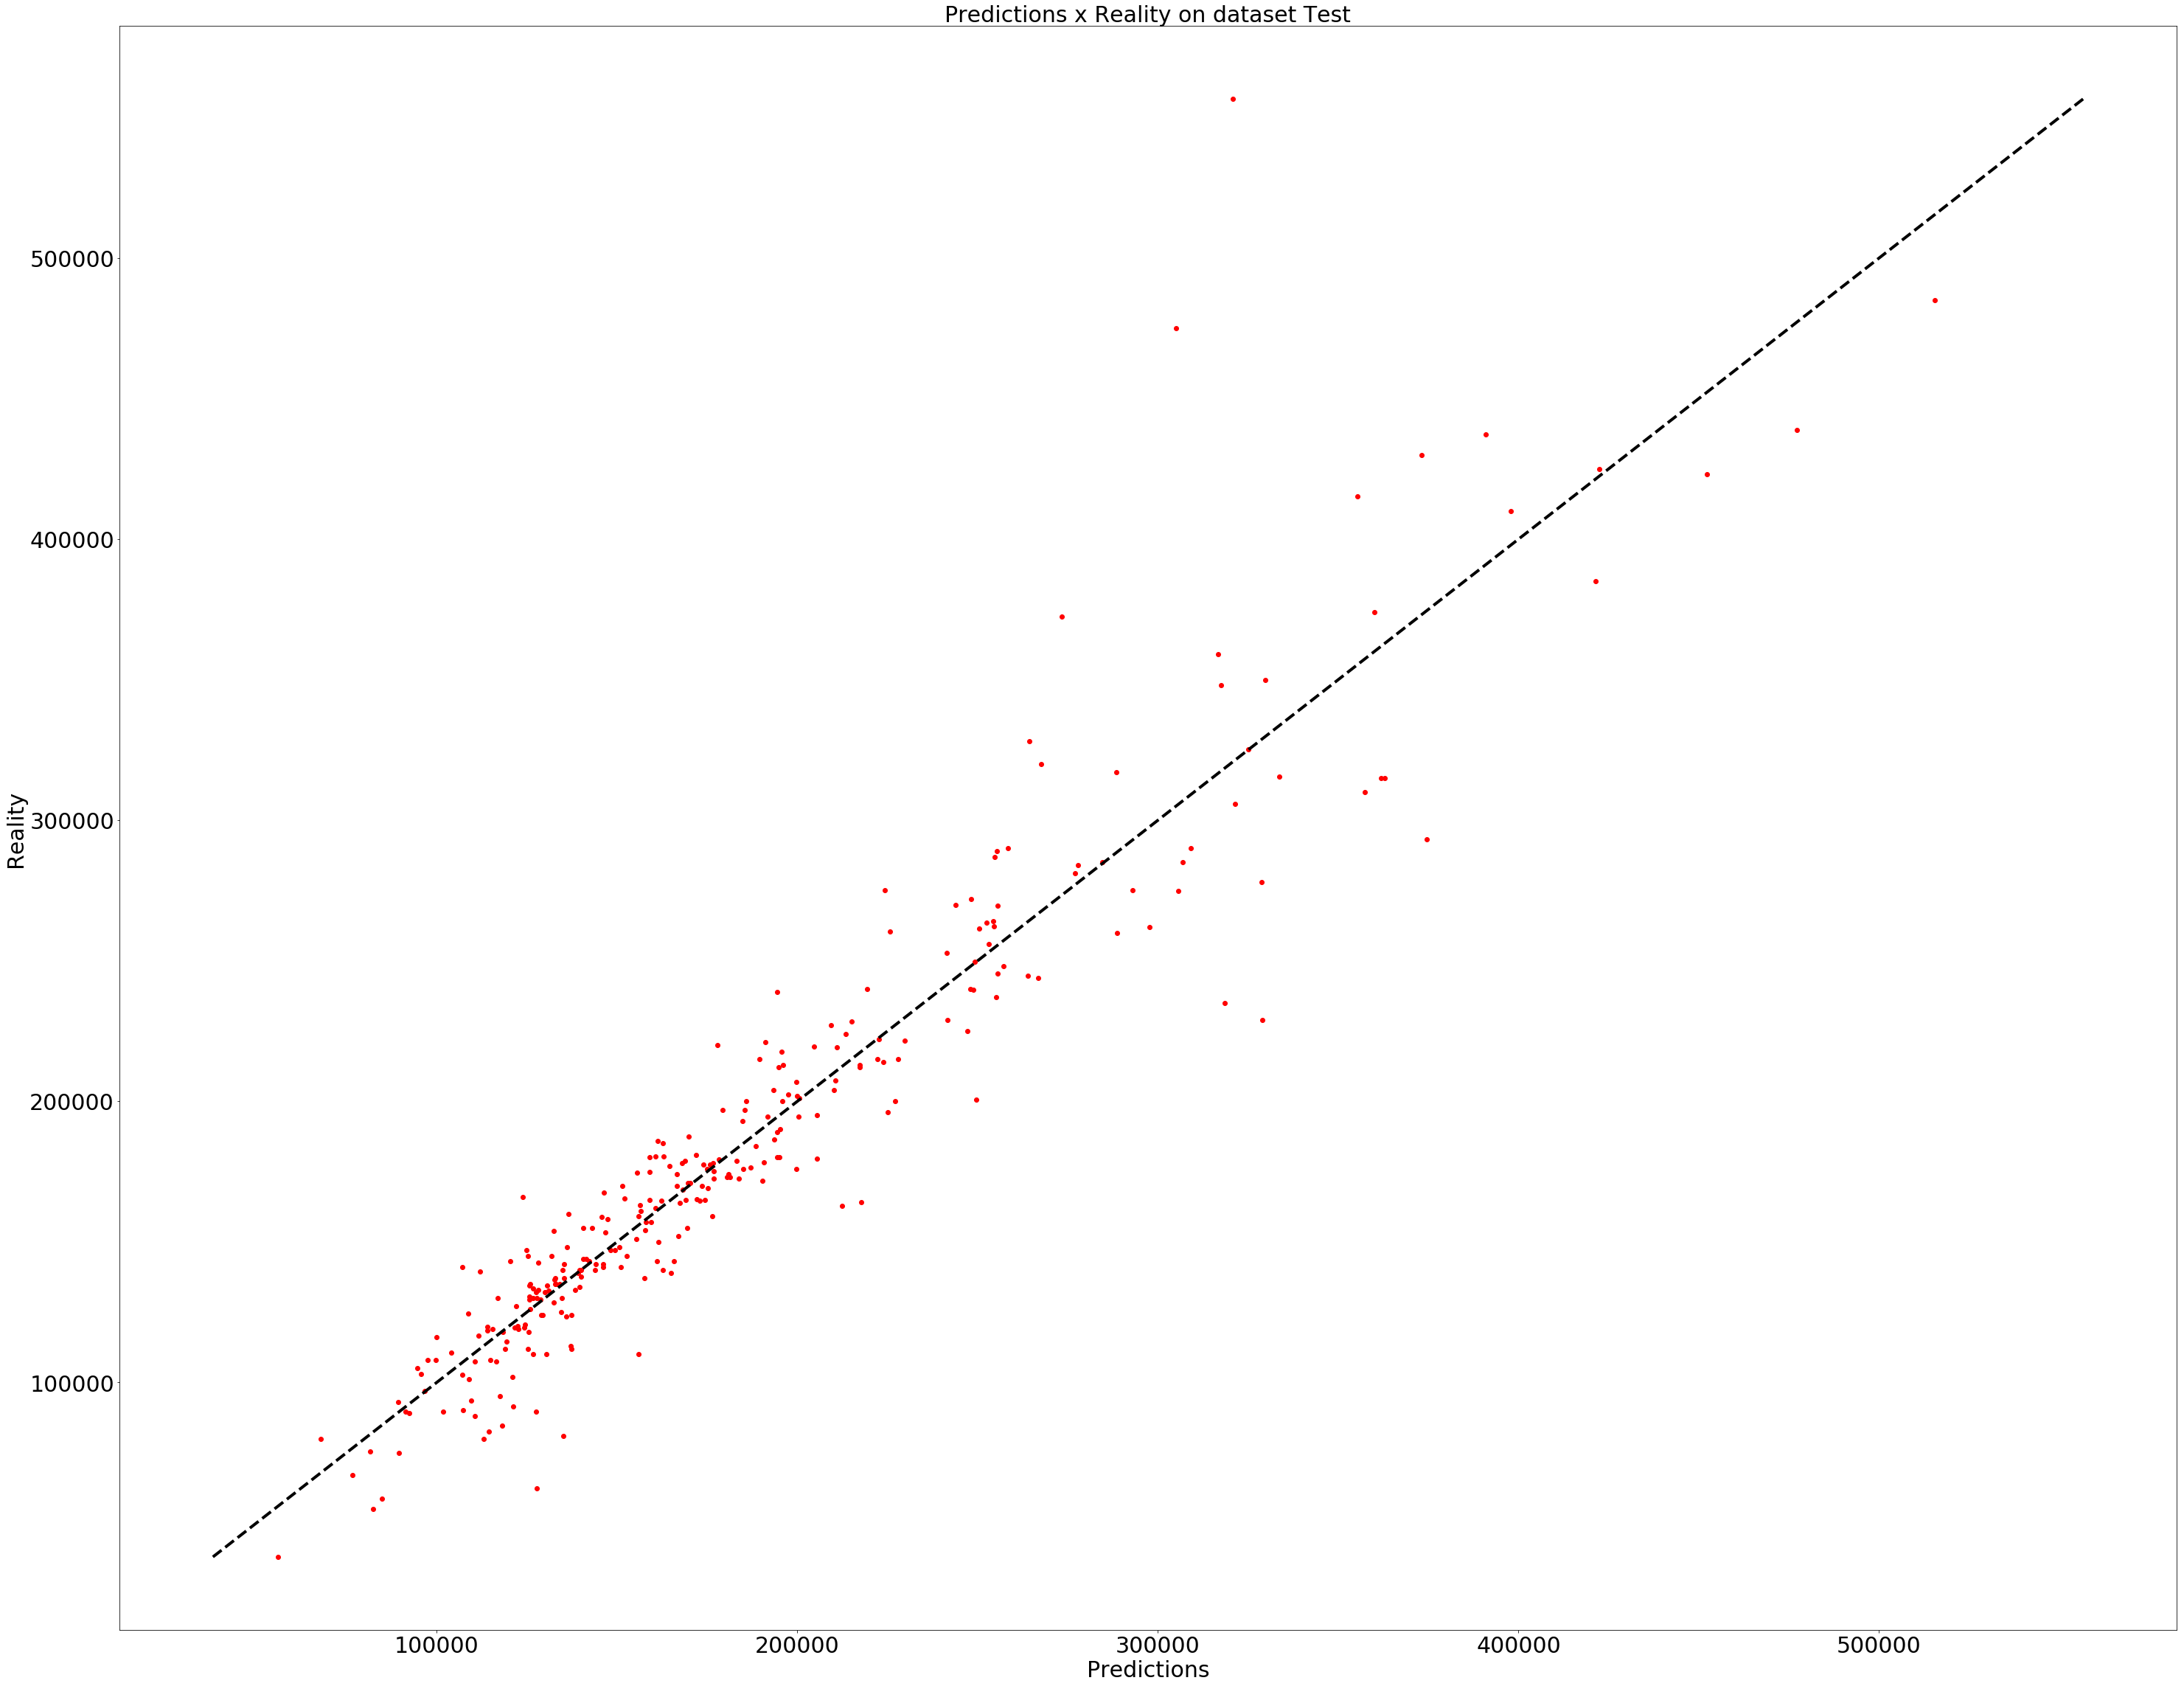

In [23]:
import matplotlib

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(predictions, reality, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality on dataset Test', fontsize = 30)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show()

In [24]:
y_predict = model(np.array(test))

def to_submit(pred_y,name_out):
    y_predict = prepro_label.inverse_transform(np.array(pred_y).reshape(-1,1))
    y_predict = pd.DataFrame(y_predict, columns = ['SalePrice'])
    testId = pd.DataFrame(ID.values, columns= ['Id'])
    y_predict = testId.join(y_predict)
    y_predict.to_csv(name_out + '.csv',index=False)
    
to_submit(y_predict, "submission_continuous")